# Nobel Prize Data Analysis
This project explores the Nobel Prize dataset to uncover key insights using Python's data analysis libraries like Pandas, Matplotlib, and Seaborn.

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Matplotlib for better visuals
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries successfully imported!")

## Step 2: Load the Dataset
We are using the Nobel Prize dataset provided as a CSV file. Let's load and preview the data.


In [31]:
# Load the dataset
df = pd.read_csv("laureate.csv")

# Display the first few rows of the dataset
print(df.head())

   id       firstname    surname        born        died  \
0   1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1   2      Hendrik A.    Lorentz  1853-07-18  1928-02-04   
2   3          Pieter     Zeeman  1865-05-25  1943-10-09   
3   4           Henri  Becquerel  1852-12-15  1908-08-25   
4   5          Pierre      Curie  1859-05-15  1906-04-19   

             bornCountry bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode   diedCity gender  year category  \
0          Germany              DE     Munich   male  1901  physics   
1  the Netherlands              NL        NaN   male  1902  physics   
2  the Netherland

## Step 3: Explore the Dataset
### Dataset Information
We'll check the dataset's structure, including the column names, data types, and any missing values.


In [32]:
# Get dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1012 non-null   int64 
 1   firstname          1012 non-null   object
 2   surname            979 non-null    object
 3   born               1011 non-null   object
 4   died               1012 non-null   object
 5   bornCountry        979 non-null    object
 6   bornCountryCode    979 non-null    object
 7   bornCity           977 non-null    object
 8   diedCountry        664 non-null    object
 9   diedCountryCode    664 non-null    object
 10  diedCity           658 non-null    object
 11  gender             1012 non-null   object
 12  year               1012 non-null   int64 
 13  category           1012 non-null   object
 14  overallMotivation  23 non-null     object
 15  share              1012 non-null   int64 
 16  motivation         1012 non-null   object


## Step 4: Clean the Dataset
We'll handle missing data, rename columns for clarity, and ensure all data types are correct.


In [33]:
# Handle missing values
df['born'] = df['born'].fillna('Unknown')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Rename columns for clarity
df.rename(columns={'firstname': 'first_name', 'surname': 'last_name', 'bornCountry': 'country'}, inplace=True)

# Preview the cleaned data
print(df.head())

   id      first_name  last_name        born        died  \
0   1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1   2      Hendrik A.    Lorentz  1853-07-18  1928-02-04   
2   3          Pieter     Zeeman  1865-05-25  1943-10-09   
3   4           Henri  Becquerel  1852-12-15  1908-08-25   
4   5          Pierre      Curie  1859-05-15  1906-04-19   

                 country bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode   diedCity gender  year category  \
0          Germany              DE     Munich   male  1901  physics   
1  the Netherlands              NL        NaN   male  1902  physics   
2  the Netherland


## Step 5: Analyze and Visualize the Data
### Question 1: How many Nobel laureates are there in each category?

category
medicine      229
physics       227
chemistry     197
peace         142
literature    121
economics      96
Name: count, dtype: int64


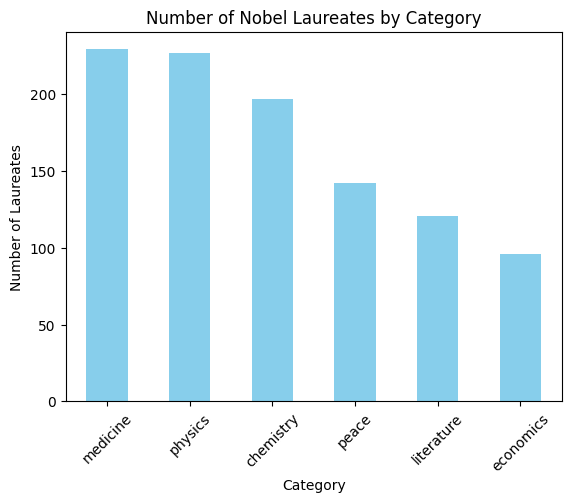

In [34]:
# Count laureates by category
category_counts = df['category'].value_counts()
print(category_counts)

# Visualize the category distribution
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Nobel Laureates by Category')
plt.xlabel('Category')
plt.ylabel('Number of Laureates')
plt.xticks(rotation=45)
plt.show()

### Question 2: What is the trend in the number of awards over decades?


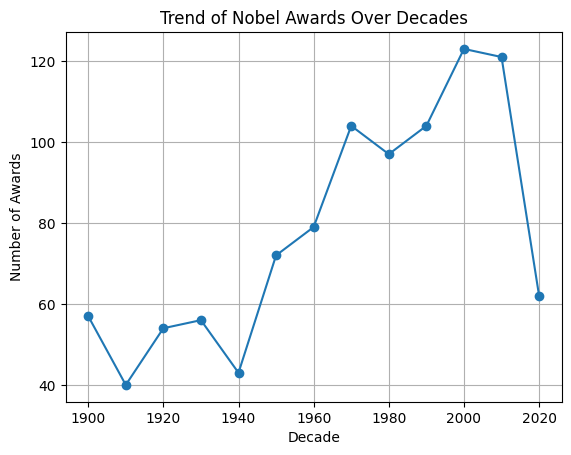

In [35]:
# Create a new column for decades
df['decade'] = (df['year'] // 10) * 10

# Group by decade and count awards
decade_counts = df.groupby('decade').size()

# Plot the trend
decade_counts.plot(kind='line', marker='o')
plt.title('Trend of Nobel Awards Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Awards')
plt.grid()
plt.show()

### Question 3: What is the gender distribution of laureates?


gender
male      915
female     66
org        31
Name: count, dtype: int64


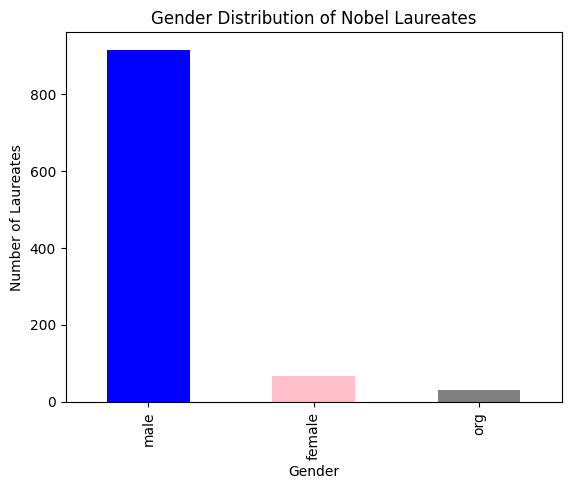

In [36]:
# Count laureates by gender
gender_counts = df['gender'].value_counts()
print(gender_counts)

# Visualize gender distribution
gender_counts.plot(kind='bar', color=['blue', 'pink', 'gray'])
plt.title('Gender Distribution of Nobel Laureates')
plt.xlabel('Gender')
plt.ylabel('Number of Laureates')
plt.show()

### Question 5: What is the average age of laureates at the time of the award?


## Insights and Conclusions
1. **Category Distribution**:
   - Physics and Chemistry have the highest number of laureates, showing a focus on these fields.
2. **Trends Over Decades**:
   - The number of awards increased significantly after the 1950s, likely due to scientific advancements.
3. **Gender Distribution**:
   - There is a significant gender imbalance, with males dominating.